In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, MaxPooling2D, Conv2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv("traindata/train.csv")
data_validation = pd.read_csv("validationdata/validation.csv")
data_test = pd.read_csv("testdata/test.csv")
data_validation

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel59991,pixel59992,pixel59993,pixel59994,pixel59995,pixel59996,pixel59997,pixel59998,pixel59999,pixel60000
0,paper,71,73,73,74,75,75,76,77,77,...,74,72,71,71,71,71,71,69,68,64
1,paper,68,64,59,56,53,54,59,62,64,...,60,59,59,59,58,57,56,55,56,53
2,paper,91,91,91,90,90,91,92,91,90,...,96,96,97,98,96,94,95,94,94,96
3,paper,100,100,100,99,98,99,101,100,100,...,114,115,115,114,114,113,112,111,113,112
4,paper,84,83,81,80,81,83,84,83,83,...,91,90,90,91,91,90,88,90,88,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,scissors,91,89,88,88,88,89,89,89,89,...,90,90,91,90,90,88,88,87,88,90
401,scissors,80,83,82,82,81,82,82,82,82,...,88,89,86,86,86,87,86,86,85,86
402,scissors,86,89,89,87,89,87,89,89,89,...,89,90,90,92,89,90,89,89,88,87
403,scissors,70,74,74,73,73,71,74,73,74,...,82,82,83,80,80,82,82,80,79,82


In [5]:
data = data.T
data_validation = data_validation.T
data_test = data_test.T
data

,0,1,2,3,4,5,6,7,8,9,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
label,paper,paper,paper,paper,paper,paper,paper,paper,paper,paper,...,scissors,scissors,scissors,scissors,scissors,scissors,scissors,scissors,scissors,scissors
pixel1,91,100,84,106,107,83,84,61,63,116,...,86,70,84,88,94,75,82,83,81,91
pixel2,91,100,83,110,108,83,87,63,64,116,...,89,74,87,86,95,78,83,85,84,89
pixel3,91,100,81,108,107,80,84,62,64,115,...,89,74,82,84,91,78,81,85,84,89
pixel4,90,99,80,107,108,82,84,63,65,116,...,87,73,83,85,92,79,81,82,85,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel59996,94,113,90,116,102,87,89,33,38,119,...,90,82,83,90,78,65,87,89,87,94
pixel59997,95,112,88,116,102,87,88,32,38,118,...,89,82,83,87,81,64,87,89,88,95
pixel59998,94,111,90,114,101,89,86,31,38,118,...,89,80,82,89,85,64,86,89,88,95
pixel59999,94,113,88,113,102,89,90,32,38,118,...,88,79,83,89,91,64,85,87,87,95


In [7]:
X_train = data[1:]
X_validation = data_validation[1:]
X_test = data_test[1:]
X_train = np.array(X_train.T)
X_validation = np.array(X_validation.T)
X_test = np.array(X_test.T)
X_train = X_train.reshape(X_train.shape[0], 200, 300, 1).astype("float32")
X_validation = X_validation.reshape(X_validation.shape[0], 200, 300, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 200, 300, 1).astype("float32")
X_train /= 255
X_validation /= 255
X_test /= 255
X_train.shape

(2100, 200, 300, 1)

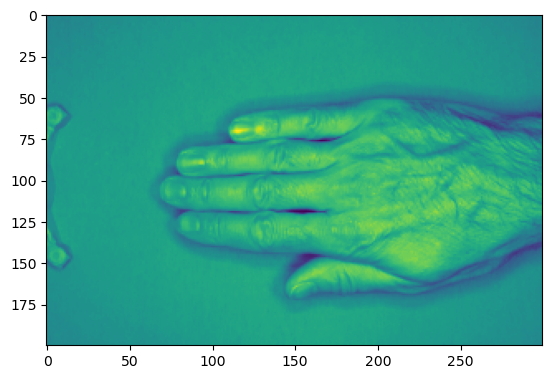

In [8]:
plt.imshow(X_train[0])
plt.show()

In [21]:
len(data_test.T['label'])

1500

In [23]:
for num in range(len(data.T['label'])):
    if data.T['label'][num] == 'paper':
        data.T['label'][num] = 0
    elif data.T['label'][num] == 'rock':
        data.T['label'][num] = 1
    elif data.T['label'][num] == 'scissors':
        data.T['label'][num] = 2
    print((num + 1) / len(data.T['label']) * 100)

0.047619047619047616
0.09523809523809523
0.14285714285714285
0.19047619047619047
0.2380952380952381
0.2857142857142857
0.33333333333333337
0.38095238095238093
0.4285714285714286
0.4761904761904762
0.5238095238095238
0.5714285714285714
0.6190476190476191
0.6666666666666667
0.7142857142857143
0.7619047619047619
0.8095238095238094
0.8571428571428572
0.9047619047619048
0.9523809523809524
1.0
1.0476190476190477
1.0952380952380953
1.1428571428571428
1.1904761904761905
1.2380952380952381
1.2857142857142856
1.3333333333333335
1.380952380952381
1.4285714285714286
1.4761904761904763
1.5238095238095237
1.5714285714285716
1.6190476190476188
1.6666666666666667
1.7142857142857144
1.7619047619047619
1.8095238095238095
1.8571428571428572
1.9047619047619049
1.9523809523809523
2.0
2.047619047619048
2.0952380952380953
2.142857142857143
2.1904761904761907
2.238095238095238
2.2857142857142856
2.3333333333333335
2.380952380952381
2.4285714285714284
2.4761904761904763
2.5238095238095237
2.571428571428571
2.6

In [24]:
for num in range(len(data_validation.T['label'])):
    if data_validation.T['label'][num] == 'paper':
        data_validation.T['label'][num] = 0
    elif data_validation.T['label'][num] == 'rock':
        data_validation.T['label'][num] = 1
    elif data_validation.T['label'][num] == 'scissors':
        data_validation.T['label'][num] = 2
    print((num + 1) / len(data_validation.T['label']) * 100)

0.24691358024691357
0.49382716049382713
0.7407407407407408
0.9876543209876543
1.2345679012345678
1.4814814814814816
1.728395061728395
1.9753086419753085
2.2222222222222223
2.4691358024691357
2.7160493827160495
2.9629629629629632
3.2098765432098766
3.45679012345679
3.7037037037037033
3.950617283950617
4.197530864197531
4.444444444444445
4.691358024691358
4.938271604938271
5.185185185185185
5.432098765432099
5.679012345679013
5.9259259259259265
6.172839506172839
6.419753086419753
6.666666666666667
6.91358024691358
7.160493827160494
7.4074074074074066
7.654320987654321
7.901234567901234
8.148148148148149
8.395061728395062
8.641975308641975
8.88888888888889
9.135802469135802
9.382716049382717
9.62962962962963
9.876543209876543
10.123456790123457
10.37037037037037
10.617283950617285
10.864197530864198
11.11111111111111
11.358024691358025
11.604938271604938
11.851851851851853
12.098765432098766
12.345679012345679
12.592592592592592
12.839506172839506
13.086419753086421
13.333333333333334
13.

In [25]:
for num in range(len(data_test.T['label'])):
    if data_test.T['label'][num] == 'paper':
        data_test.T['label'][num] = 0
    elif data_test.T['label'][num] == 'rock':
        data_test.T['label'][num] = 1
    elif data_test.T['label'][num] == 'scissors':
        data_test.T['label'][num] = 2
    print((num + 1) / len(data_test.T['label']) * 100)

0.06666666666666667
0.13333333333333333
0.2
0.26666666666666666
0.33333333333333337
0.4
0.46666666666666673
0.5333333333333333
0.6
0.6666666666666667
0.7333333333333333
0.8
0.8666666666666666
0.9333333333333335
1.0
1.0666666666666667
1.1333333333333333
1.2
1.2666666666666666
1.3333333333333335
1.4000000000000001
1.4666666666666666
1.5333333333333332
1.6
1.6666666666666667
1.7333333333333332
1.7999999999999998
1.866666666666667
1.9333333333333333
2.0
2.0666666666666664
2.1333333333333333
2.1999999999999997
2.2666666666666666
2.3333333333333335
2.4
2.466666666666667
2.533333333333333
2.6
2.666666666666667
2.7333333333333334
2.8000000000000003
2.8666666666666667
2.933333333333333
3.0
3.0666666666666664
3.1333333333333333
3.2
3.266666666666666
3.3333333333333335
3.4000000000000004
3.4666666666666663
3.5333333333333337
3.5999999999999996
3.6666666666666665
3.733333333333334
3.8
3.8666666666666667
3.933333333333333
4.0
4.066666666666666
4.133333333333333
4.2
4.266666666666667
4.3333333333333

In [26]:
set(data.T['label'])

{0, 1, 2}

In [44]:
n_classes = 3
y_train = data.T["label"]
y_validation = data_validation.T["label"]
y_test = data_test.T["label"]
y_train = np.array(y_train)
y_validation = np.array(y_validation)
y_test = np.array(y_test)
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_validation = tf.keras.utils.to_categorical(y_validation, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)
y_train[800]

array([0., 1., 0.], dtype=float32)

In [45]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(200, 300, 1)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(n_classes, activation="softmax")
])

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[928256,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]

In [41]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=200, epochs=100, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_7/conv2d_14/Relu' defined at (most recent call last):
    File "c:\Users\User\miniconda3\envs\tf\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\User\miniconda3\envs\tf\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\User\miniconda3\envs\tf\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\User\miniconda3\envs\tf\lib\asyncio\base_events.py", line 1899, in _run_once
      handle._run()
    File "c:\Users\User\miniconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_9776\900186219.py", line 2, in <module>
      model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_validation, y_validation))
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\User\miniconda3\envs\tf\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential_7/conv2d_14/Relu'
OOM when allocating tensor with shape[32,32,198,298] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_7/conv2d_14/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_2404]

In [9]:
model

In [15]:
X_test[0].shape

(128, 128, 1)

In [16]:
z_predict = model.predict(X_test)
print(np.sum(z_predict.argmax(axis=1) == y_test.argmax(axis=1)) / len(y_test) * 100)
print(z_predict[0])
print(y_test[0])

6/6 [==============================] - 0s 21ms/step
100.0
[2.1441213e-08 9.9728227e-01 2.6031632e-03 1.4827135e-07 4.6977650e-08
 2.4755352e-07 1.0107353e-05 1.0275449e-04 2.2482789e-09 1.2289730e-06]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
print(z_predict.argmax())
print(y_test.argmax())

202
1


In [17]:
model.save('my_model.h5')

In [1]:
from tensorflow.keras.models import load_model

In [2]:
new_model = load_model('my_model.h5')
new_model